In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import time

In [2]:
file = pd.read_csv('passes.csv')

In [3]:
file.head()

,time_start,time_end,sender_id,receiver_id,x_1,x_2,x_3,x_4,x_5,x_6,...,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28
0,1396100,1397300,26,18,890.0,830.0,1610.0,NaN,310.0,310.0,...,NaN,3080.0,-180.0,-110.0,390.0,-2470.0,330.0,0.0,NaN,1430.0
1,78900,81100,11,14,3070.0,NaN,940.0,4450.0,1460.0,1680.0,...,2240.0,NaN,NaN,-720.0,2470.0,1230.0,1380.0,770.0,-1350.0,-160.0
2,36600,37300,4,10,-180.0,NaN,-1440.0,-160.0,-1370.0,-1140.0,...,2250.0,NaN,NaN,320.0,2230.0,1370.0,570.0,1340.0,-920.0,650.0
3,370300,371300,12,7,-950.0,-1140.0,1110.0,NaN,-310.0,-2210.0,...,70.0,NaN,-400.0,1620.0,270.0,1200.0,-1810.0,170.0,1820.0,NaN
4,600,1400,15,24,-880.0,-930.0,-1460.0,150.0,-740.0,-110.0,...,NaN,-450.0,-480.0,260.0,NaN,-210.0,2650.0,2380.0,-2790.0,NaN


In [4]:
np.max(file.time_start)/60000 #-np.max(file.time_start)

50.670000000000002

In [5]:
#file[(np.isfinite(file.x_4) == False) & (np.isfinite(file.x_19) == False)]

In [6]:
#file[(file['sender_id'] < 15) & (file['receiver_id'] < 15) ]

In [7]:
file.loc[:,'x_28'].values

array([-1550.,  1360., -1420., ...,   920., -1390.,   180.])

In [8]:
data = pd.DataFrame()
data['sender'] = file['sender_id']
data['receiver'] = file['receiver_id']
data['time_start'] = file['time_start']
data['time_end'] = file['time_end']
for i in range(1,29):
    data['P'+str(i)] = list(zip(file['x_'+str(i)],file['y_'+str(i)]))

In [9]:
data.head()

,sender,receiver,time_start,time_end,P1,P2,P3,P4,P5,P6,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,26,18,1396100,1397300,"(890.0, 200.0)","(830.0, -440.0)","(1610.0, -460.0)","(nan, nan)","(310.0, 860.0)","(310.0, -1380.0)",...,"(nan, nan)","(-170.0, 3080.0)","(140.0, -180.0)","(-4820.0, -110.0)","(-2090.0, 390.0)","(-310.0, -2470.0)","(-1010.0, 330.0)","(100.0, 0.0)","(nan, nan)","(-1550.0, 1430.0)"
1,11,14,78900,81100,"(3070.0, 800.0)","(nan, nan)","(940.0, -460.0)","(4450.0, 2050.0)","(1460.0, 1320.0)","(1680.0, 2300.0)",...,"(-110.0, 2240.0)","(nan, nan)","(nan, nan)","(-660.0, -720.0)","(1960.0, 2470.0)","(2810.0, 1230.0)","(4960.0, 1380.0)","(-580.0, 770.0)","(3310.0, -1350.0)","(1360.0, -160.0)"
2,4,10,36600,37300,"(-180.0, 1040.0)","(nan, nan)","(-1440.0, 1010.0)","(-160.0, 2330.0)","(-1370.0, 1070.0)","(-1140.0, 1330.0)",...,"(-1580.0, 2250.0)","(nan, nan)","(nan, nan)","(-2290.0, 320.0)","(-440.0, 2230.0)","(-170.0, 1370.0)","(600.0, 570.0)","(-2170.0, 1340.0)","(-250.0, -920.0)","(-1420.0, 650.0)"
3,12,7,370300,371300,"(-950.0, 1170.0)","(-1140.0, -390.0)","(1110.0, 530.0)","(nan, nan)","(-310.0, 2370.0)","(-2210.0, -1870.0)",...,"(3960.0, 70.0)","(nan, nan)","(710.0, -400.0)","(-1570.0, 1620.0)","(-590.0, 270.0)","(-250.0, 1200.0)","(-70.0, -1810.0)","(-1540.0, 170.0)","(160.0, 1820.0)","(nan, nan)"
4,15,24,600,1400,"(-880.0, -20.0)","(-930.0, 1040.0)","(-1460.0, -1660.0)","(150.0, -720.0)","(-740.0, -330.0)","(-110.0, 1370.0)",...,"(nan, nan)","(1290.0, -450.0)","(2340.0, -480.0)","(950.0, 260.0)","(nan, nan)","(0.0, -210.0)","(830.0, 2650.0)","(10.0, 2380.0)","(1230.0, -2790.0)","(nan, nan)"


In [10]:
def get_loc(index,P):
    x = data[index:index+1][P].values[0][0]
    y = data[index:index+1][P].values[0][1]
    
    if not np.isfinite(x):
        x = 6000
        y = 0
    if not np.isfinite(y):
        x=6000
        y=0
    return x,y

def distance(index,P1,P2):
    return np.sqrt((get_loc(index,P1)[0]-get_loc(index,P2)[0])**2 + (get_loc(index,P1)[1]-get_loc(index,P2)[1])**2)    

In [11]:
print (get_loc(0,'P26'))
print (get_loc(0,'P18'))
print (distance(0,'P26','P18'))

(100.0, 0.0)
(-850.0, -180.0)
966.902270139


In [12]:
l=[]
for i in range(1,29):
    l.append(distance(0,'P26','P'+str(i)))

sender=  [9]      receiver=  [3]


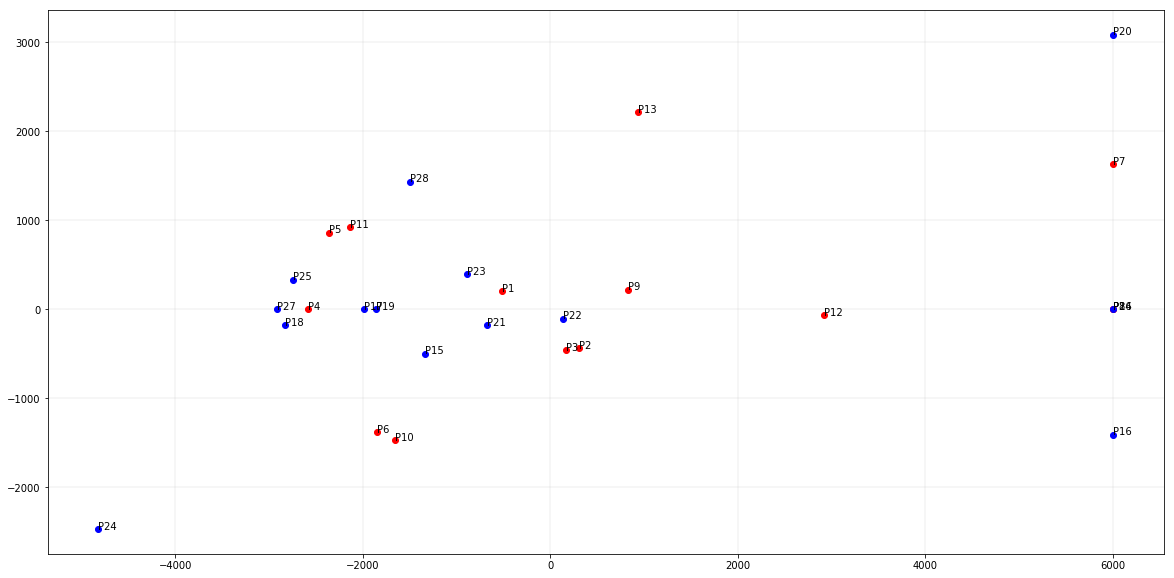

,sender,receiver,time_start,time_end,P1,P2,P3,P4,P5,P6,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
12000,9,3,86400,87500,"(-520.0, -170.0)","(310.0, -2190.0)","(170.0, 1090.0)","(-2590.0, -510.0)","(-2360.0, 2890.0)","(-1850.0, 1500.0)",...,"(-1860.0, 170.0)","(nan, nan)","(-680.0, -360.0)","(130.0, -350.0)","(-890.0, -1890.0)","(-4820.0, -100.0)","(-2740.0, 1520.0)","(nan, nan)","(-2920.0, -1030.0)","(-1500.0, -880.0)"


In [13]:
h = 12000
print ('sender= ',data[h:h+1]['sender'].values,'     receiver= ',data[h:h+1]['receiver'].values)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10

plt.grid(linestyle='-', linewidth=0.2)

for i in range(1,29):
    if i<15:
        if np.isfinite(get_loc(h,'P'+str(i))[0]) and np.isfinite(get_loc(h,'P'+str(i))[1]):
            plt.plot(get_loc(h,'P'+str(i))[0],get_loc(0,'P'+str(i))[1],'ro')
            text_ = 'P'+str(i)
            plt.text(get_loc(h,text_)[0],get_loc(0,text_)[1],text_)
    else:
         if np.isfinite(get_loc(h,'P'+str(i))[0]) and np.isfinite(get_loc(h,'P'+str(i))[1]):
            plt.plot(get_loc(h,'P'+str(i))[0],get_loc(0,'P'+str(i))[1],'bo')
            text_ = 'P'+str(i)
            plt.text(get_loc(h,text_)[0],get_loc(0,text_)[1],text_)
plt.legend()
plt.show()
data[h:h+1]

In [14]:
## Count the number of NaNs in every row
for index_ in range(data.shape[0]):
    cou = 0
    for element in data.iloc[i,4:]:
        if (np.isfinite(element[0]) == False) and (np.isfinite(element[1]) ==  False):
            cou +=1
    if (cou != 6):
        print (index_)
        

In [15]:
remove = []
# Same sender and receiver
for index_ in range(data.shape[0]):
    if data.sender[index_] == data.receiver[index_]:
        remove.append(index_)
        print (index_)
        

655
2268
2729
9082
9795
11269


In [16]:
# Receiver is nan
for index_ in range(data.shape[0]):
    if (np.isfinite(data['P'+str(data.receiver[index_])][index_][0]) == False):
        remove.append(index_)
        print (index_)

898


In [17]:
# Sender is nan
for index_ in range(data.shape[0]):
    if (np.isfinite(data['P'+str(data.sender[index_])][index_][0]) == False):
        remove.append(index_)
        print (index_)

1161


In [18]:
remove

[655, 2268, 2729, 9082, 9795, 11269, 898, 1161]

In [19]:
data[653:656]

,sender,receiver,time_start,time_end,P1,P2,P3,P4,P5,P6,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
653,17,28,247400,248800,"(-1180.0, 2030.0)","(-1140.0, 360.0)","(-620.0, -1480.0)","(20.0, 2450.0)","(-2160.0, -930.0)","(190.0, 820.0)",...,"(nan, nan)","(nan, nan)","(-3590.0, 1000.0)","(-2690.0, 1630.0)","(-970.0, 2600.0)","(4230.0, 160.0)","(660.0, -1190.0)","(350.0, 1080.0)","(1050.0, 2340.0)","(-750.0, 1170.0)"
654,24,27,1925800,1927200,"(-2090.0, 1040.0)","(-1650.0, 2250.0)","(nan, nan)","(-1520.0, -340.0)","(-2920.0, -770.0)","(nan, nan)",...,"(-1180.0, 2030.0)","(-1810.0, -1110.0)","(-1060.0, 160.0)","(-2590.0, 1410.0)","(nan, nan)","(-540.0, 2570.0)","(240.0, 1910.0)","(nan, nan)","(-1610.0, 1260.0)","(nan, nan)"
655,17,17,2849000,2849200,"(1460.0, 2650.0)","(2160.0, 3050.0)","(nan, nan)","(3310.0, 1090.0)","(730.0, 50.0)","(nan, nan)",...,"(nan, nan)","(1130.0, 3160.0)","(1400.0, 2500.0)","(2460.0, 3110.0)","(nan, nan)","(5320.0, 250.0)","(3520.0, -80.0)","(2640.0, 860.0)","(3770.0, 1320.0)","(nan, nan)"


In [20]:
def map_player(index):
    sender = data.sender[index] #id of sender player
    mapp = {}
    
    
    if sender < 15:
        for i in range(1,15):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                mapp[i]=distance(index,'P'+str(sender),text)
        
        mapp=sorted(mapp.items(), key=operator.itemgetter(1))
        
        li={}
        
        for i in range(15,29):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                li[i]=distance(index,'P'+str(sender),text)
                
        li=sorted(li.items(), key=operator.itemgetter(1))
        
        mapp.extend(li)
                
    elif sender > 14:
        for i in range(15,29):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                mapp[i]=distance(index,'P'+str(sender),text)
        
        mapp=sorted(mapp.items(), key=operator.itemgetter(1))
        
        li={}
        
        for i in range(1,15):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                li[i]=distance(index,'P'+str(sender),text)
                
        li=sorted(li.items(), key=operator.itemgetter(1))
        
        mapp.extend(li)
            
    return mapp

In [21]:
data.loc[5,'P7']

(nan, nan)

In [22]:
mapp=map_player(3432)
mapp

[(1, 1216.4292005702594),
 (3, 1303.8404810405298),
 (11, 1373.608386695422),
 (6, 2048.3163818121457),
 (5, 2603.2479712851023),
 (13, 2733.5873865673288),
 (4, 3860.8289265389626),
 (9, 4026.1768465878395),
 (10, 4081.0047782378301),
 (12, 5014.14997781279),
 (21, 121.6552506059644),
 (15, 346.69871646719434),
 (26, 906.20086073673531),
 (28, 909.17545061445651),
 (18, 1173.243367763057),
 (25, 1179.2370414806346),
 (27, 1591.7600321656528),
 (22, 2268.0828909014767),
 (23, 2410.0622398602072),
 (17, 2635.773131360133),
 (24, 3930.2417228460645)]

In [23]:
def make_feature(index):
    mapp = map_player(index)
    receiver = data.receiver[index]
    
    id_list=[]
    dist_list=[]    
    
    for element in mapp:
        dist_list.append(element[1])
        id_list.append(element[0])
        
    x = np.array(dist_list)
       
    y = np.zeros((1,21))
    y[0,id_list.index(receiver)] = 1

    return x,y      

In [24]:
start = time.time()
X = np.zeros((1,21))
for i in range(data.shape[0]):
    if i not in remove:
        x,y = make_feature(i)
        if x.shape[0] == 21:
            X = np.append(X,(np.array([x])),axis=0)
            
print ('Time taken to run this block= ',time.time(),' s.')

Time taken to run this block=  1529351911.79904  s.


In [25]:
X = np.matrix(np.delete(X, (0), axis=0))

In [26]:
X.shape

(11682, 21)

In [27]:
np.savetxt('unscaled_featmat.txt',X)

In [28]:
make_feature(5)

(array([  434.16586692,   857.02975444,   954.25363505,  1007.02532242,
         1042.01727433,  1251.59897731,  1451.20639469,  2427.87973343,
         3030.14851121,  7481.79791227,    89.4427191 ,   372.15588132,
          430.464865  ,   467.5467891 ,   541.29474411,   895.54452709,
         1004.48992031,  1181.27050247,  1261.26920203,  1290.34879006,
         1656.80415258]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))